In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
url="https://drive.google.com/file/d/1dKZxapT3xLzOTOpy1LCyqctL8YEvzp4Y/view?usp=drive_link"
url="https://drive.google.com/uc?id="+ url.split("/")[-2]
df=pd.read_csv(url)

Task 1: Top Cuisines

determine the top three most common cuisine of the dataset

In [9]:
print(df.shape)
print(df.columns)
print(df['Cuisines'])

(9551, 21)
Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')
0             French, Japanese, Desserts
1                               Japanese
2       Seafood, Asian, Filipino, Indian
3                        Japanese, Sushi
4                       Japanese, Korean
                      ...               
9546                             Turkish
9547     World Cuisine, Patisserie, Cafe
9548              Italian, World Cuisine
9549                     Restaurant Cafe
9550                                Cafe
Name: Cuisines, Length: 9551, dtype: object


In [10]:
cuisine_count=df['Cuisines'].str.split(', ').explode('Cuisines').value_counts()
print(cuisine_count)
top_cuisine=cuisine_count.head(3)
print("The Top 3 Cuisines are: ",top_cuisine)

Cuisines
North Indian      3960
Chinese           2735
Fast Food         1986
Mughlai            995
Italian            764
                  ... 
Fish and Chips       1
Malwani              1
Cuisine Varies       1
Soul Food            1
B�_rek               1
Name: count, Length: 145, dtype: int64
The Top 3 Cuisines are:  Cuisines
North Indian    3960
Chinese         2735
Fast Food       1986
Name: count, dtype: int64


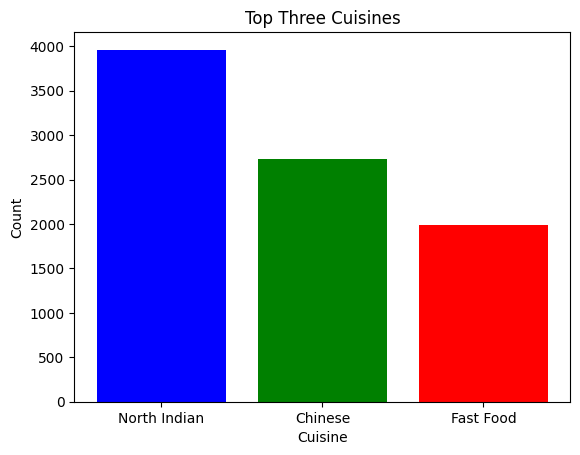

In [12]:
colours = ['blue', 'green', 'red']
plt.bar(top_cuisine.index, top_cuisine.values, color=colours)
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.title('Top Three Cuisines')
plt.show()

Calculate the percentage of restaurants that serve each of the top cuisines.

In [18]:
total_restaurant = len(df) 
print(total_restaurant)
top_cuisine10=cuisine_count.head(5)
percentages = (top_cuisine10 / total_restaurant) * 100
print("The Market share of Top 5 Cuisines are: ",percentages)

9551
The Market share of Top 5 Cuisines are:  Cuisines
North Indian    41.461627
Chinese         28.635745
Fast Food       20.793634
Mughlai         10.417757
Italian          7.999162
Name: count, dtype: float64


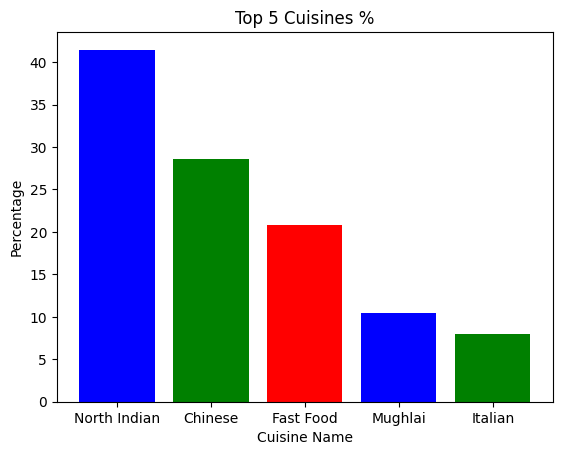

<Figure size 1200x600 with 0 Axes>

In [19]:
plt.bar(top_cuisine10.index, percentages.values, color=colours)
plt.xlabel('Cuisine Name')
plt.ylabel('Percentage')
plt.title('Top 5 Cuisines %')
plt.figure(figsize=(12,6))
plt.show()

Task 2:city Analysis

Identify the city with the highest number of restaurants in the dataset.

In [20]:
city_count =df['City'].value_counts()
restaurants = city_count.head(1)
print("City with the highest number of restaurants is :", city_count.idxmax())
print(restaurants)

City with the highest number of restaurants is : New Delhi
City
New Delhi    5473
Name: count, dtype: int64


Calculate the average rating for restaurants in each city.

In [21]:
rating_by_city= df.groupby('City')['Aggregate rating'].mean()
print("The average Rating of each city ",rating_by_city)

The average Rating of each city  City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 141, dtype: float64


Determine the city with the highest average rating.

In [23]:
top_rated_city=rating_by_city.idxmax()
value=rating_by_city.max()
print("The city with Highest Average Rating =",top_rated_city, ",","Rating =", value)

The city with Highest Average Rating = Inner City , Rating = 4.9


Task 3: Price range Distribution

Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.

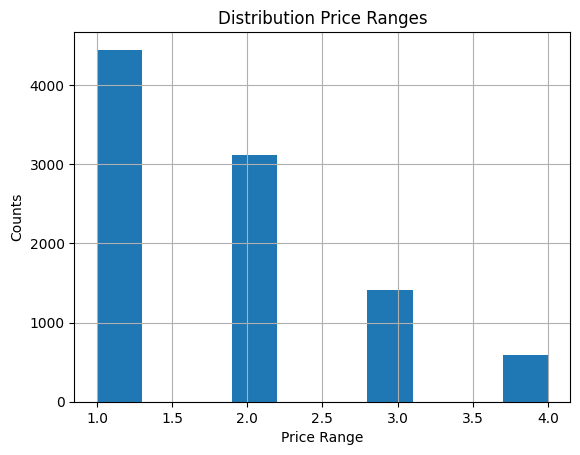

In [25]:
df.hist(column="Price range")
plt.title('Distribution Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Counts')
plt.show()

Calculate the percentage of restaurants each price range category.

In [30]:
price_range_count=df["Price range"].value_counts()
total_restaurant = len(df)
percentage =round((price_range_count/total_restaurant)*100,2)
percentage_m= pd.merge(price_range_count, percentage,on="Price range")
print("The % of Resturent in each Price Range Category are : ")
print(percentage_m)

The % of Resturent in each Price Range Category are : 
             count_x  count_y
Price range                  
1               4444    46.53
2               3113    32.59
3               1408    14.74
4                586     6.14


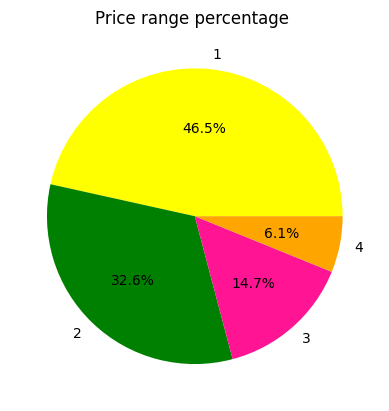

In [35]:
plt.pie(percentage, labels=percentage.index, autopct='%1.1f%%',colors=["yellow", "green","deeppink", "orange"])
plt.title("Price range percentage ")
plt.show()

Task 4: online Delivery

Determine the percentage of restaurants at offer online delivery.

In [37]:
online_delivery=df['Has Online delivery'].value_counts().get('Yes', 0)
print("Total Resturent with Online Delivery: ",online_delivery)

no=df['Has Online delivery'].value_counts().get('No', 0)
print("Resturent with NO Online Delivery : ",no)

Total Resturent with Online Delivery:  2451
Resturent with NO Online Delivery :  7100


In [38]:
Row_count= len(df)
percentage_of_online_delivery= round((online_delivery/Row_count)*100,2)
print("Total % of Online Delivery ", percentage_of_online_delivery)

percentage_of_NO_online_delivery =round((no/Row_count) *100,2)
print("Total % where Online Delivery is not present : ",percentage_of_NO_online_delivery)

Total % of Online Delivery  25.66
Total % where Online Delivery is not present :  74.34


Compare the average ratings of restaurants the and without online delivery.

In [42]:
Avg_rating_yes= round(df [df['Has Online delivery'] == 'Yes']['Aggregate rating'].mean(),2)
print("Average Rating with online Delivery : ",Avg_rating_yes)

Avg_rating_No= round(df[df['Has Online delivery'] == 'No']['Aggregate rating'].mean(),2)
print("Average Rating without online Delivery: ",Avg_rating_No)

Average Rating with online Delivery :  3.25
Average Rating without online Delivery:  2.47


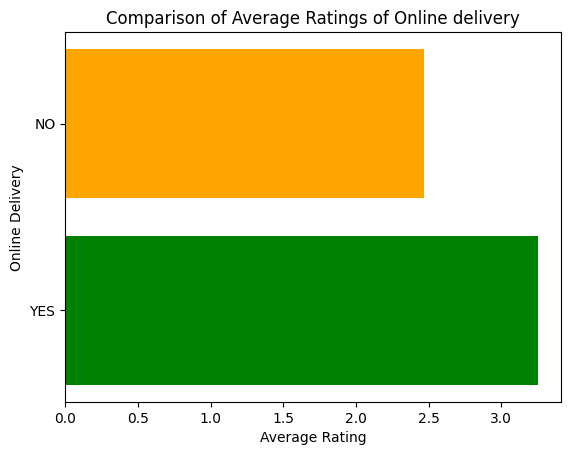

In [43]:
labels =['YES', 'NO']
average_rating =[Avg_rating_yes, Avg_rating_No]
plt.barh(labels, average_rating, color=('green', 'orange'))
plt.ylabel('Online Delivery')
plt.xlabel('Average Rating')
plt.title('Comparison of Average Ratings of Online delivery')
plt.show()